In [120]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
default_cycler = cycler(
    color=[
        [138/255, 38/255, 38/255],
        [189/255, 140/255, 70/255],
        [60/255, 70/255, 105/255],
        [130/255, 100/255, 65/255],
        [127/255, 127/255, 127/255]
    ]
)
import matplotlib.pyplot as plt
plt.rc('axes', prop_cycle=default_cycler)
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams['font.size'] = 14


# Fig1-GBM

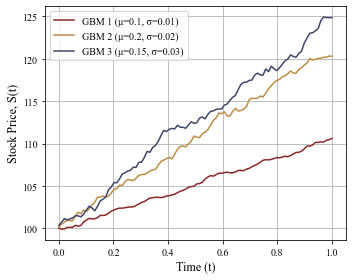

In [36]:


# Parameters
S0 = 100  # initial stock price
dt = 0.01  # time step
T = 1  # total time
N = round(T/dt)  # number of time steps
t = np.linspace(0, T, N)  # time vector

# Define parameters for three GBMs
params = [(0.1, 0.01), (0.2, 0.02), (0.15, 0.03)]  # each tuple is (mu, sigma)
labels = ["GBM 1 (μ=0.1, σ=0.01)", "GBM 2 (μ=0.2, σ=0.02)", "GBM 3 (μ=0.15, σ=0.03)"]
# colors = ["blue", "red", "grey"]
linestyles = ["-", "--", ":"]

# Plotting the GBMs
plt.figure(figsize=(5, 4))

for idx, (mu, sigma) in enumerate(params):
    W = np.random.standard_normal(size = N)
    W = np.cumsum(W)*np.sqrt(dt)  # standard brownian motion
    X = (mu - 0.5*sigma**2)*t + sigma*W 
    S = S0*np.exp(X)  # geometric brownian motion
    plt.plot(t, S, label=labels[idx])

plt.xlabel('Time (t)', fontsize=12)
plt.ylabel('Stock Price, S(t)', fontsize=12)
# plt.title('Geometric Brownian Motion of Stocks', fontsize=15)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the figure as a high-resolution PNG
plt.savefig('/Users/yiyaoluo/Desktop/Dissertation/figs/1-GBM.png', dpi=600)

plt.show()


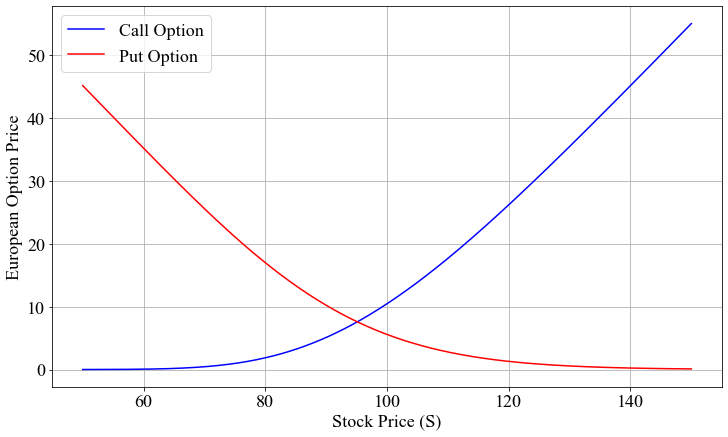

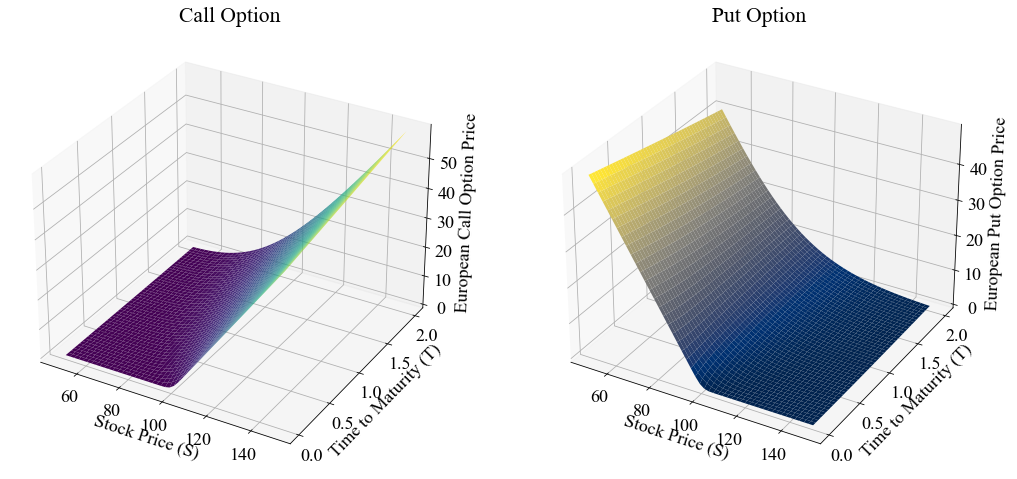

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D

def black_scholes_call(S, X, T, r, sigma):
    d1 = (math.log(S / X) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    call_price = S * norm.cdf(d1) - X * math.exp(-r * T) * norm.cdf(d2)
    return call_price

def black_scholes_put(S, X, T, r, sigma):
    d1 = (math.log(S / X) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    put_price = X * math.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price

# 给定参数
X = 100
r = 0.05
sigma = 0.2

# 二维图表
S_values = np.linspace(50, 150, 400)
call_values = [black_scholes_call(S, X, 1, r, sigma) for S in S_values]
put_values = [black_scholes_put(S, X, 1, r, sigma) for S in S_values]

plt.figure(figsize=(12, 7))
plt.plot(S_values, call_values, label='Call Option', color='blue')
plt.plot(S_values, put_values, label='Put Option', color='red')
plt.xlabel('Stock Price (S)')
plt.ylabel('European Option Price')
# plt.title(f'European Option Price vs. Stock Price\nX={X}, r={r}, sigma={sigma}')
plt.legend()
plt.grid(True)
plt.savefig('/Users/yiyaoluo/Desktop/Dissertation/figs/2D_Euro.png', dpi=300)
plt.show()

# 三维图表
S_values_3D = np.linspace(50, 150, 50)
T_values = np.linspace(0.01, 2, 50)
S_grid, T_grid = np.meshgrid(S_values_3D, T_values)
call_values_3D = np.array([black_scholes_call(S, X, T, r, sigma) for T, S in zip(np.ravel(T_grid), np.ravel(S_grid))]).reshape(T_grid.shape)
put_values_3D = np.array([black_scholes_put(S, X, T, r, sigma) for T, S in zip(np.ravel(T_grid), np.ravel(S_grid))]).reshape(T_grid.shape)

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(S_grid, T_grid, call_values_3D, cmap='viridis')
ax.set_title('Call Option')
ax.set_xlabel('Stock Price (S)')
ax.set_ylabel('Time to Maturity (T)')
ax.set_zlabel('European Call Option Price')

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(S_grid, T_grid, put_values_3D, cmap='cividis')
ax.set_title('Put Option')
ax.set_xlabel('Stock Price (S)')
ax.set_ylabel('Time to Maturity (T)')
ax.set_zlabel('European Put Option Price')

# plt.suptitle(f'European Option Price vs. Stock Price and Time to Maturity\nX={X}, r={r}, sigma={sigma}')
plt.tight_layout()
plt.savefig('/Users/yiyaoluo/Desktop/Dissertation/figs/3D_Euro.png', dpi=300)
plt.show()


# Montecarlo

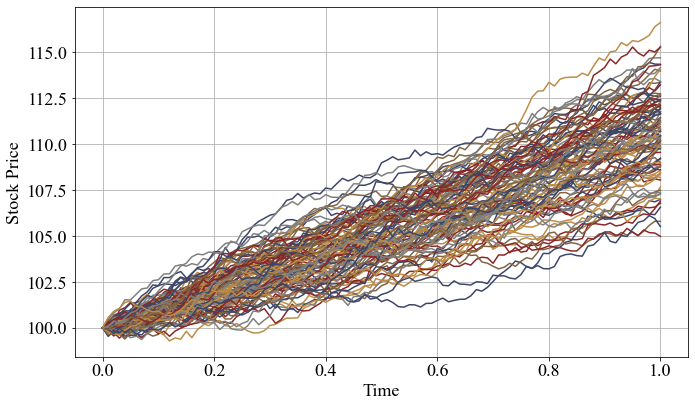

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S0 = 100  # Initial stock price
T = 1  # Time to maturity (in years)
dt = 0.01  # Time interval (in years)
mu = 0.1  # Drift (average return)
sigma = 0.02  # Volatility (standard deviation of return)
M = 100  # Number of simulations

# Calculate number of time steps
N = int(T / dt)

# Generate random normal values for stock price changes
rand_values = np.random.normal(0, 1, (M, N))

# Initialize array to store simulated stock prices
S = np.zeros((M, N+1))
S[:, 0] = S0  # Set initial stock price

# Perform Monte Carlo simulation
for i in range(1, N+1):
    drift = (mu - 0.5 * sigma**2) * dt
    diffusion = sigma * np.sqrt(dt) * rand_values[:, i-1]
    S[:, i] = S[:, i-1] * np.exp(drift + diffusion)

# Plot the simulated stock prices
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, T+dt, dt), S.T)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Stock Price', fontsize=18)
# plt.title('Stock Price Simulation')
plt.grid(True)
plt.tight_layout()
plt.savefig('/Users/yiyaoluo/Desktop/Dissertation/figs/1-MC.png', dpi=300)
plt.show()


# Quasi-Montecarlo

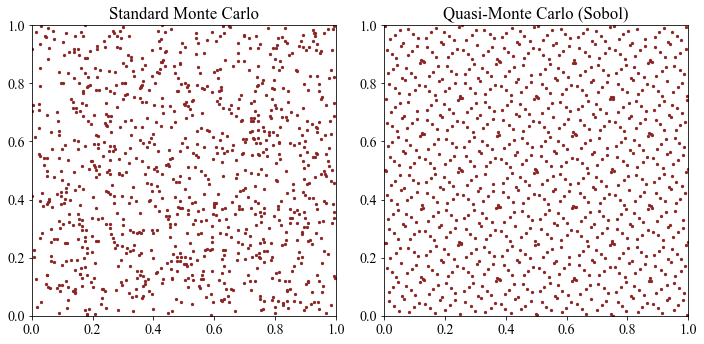

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import sobol_seq

# 生成点的数量
n_points = 1000

# 使用标准的蒙特卡洛方法生成随机点
mc_points = np.random.rand(n_points, 2)

# 使用Sobol序列生成Quasi-Monte Carlo点
quasi_mc_points = sobol_seq.i4_sobol_generate(2, n_points)

# 绘图
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(mc_points[:, 0], mc_points[:, 1], s=5)
ax[0].set_title("Standard Monte Carlo")
ax[0].set_xlim(0, 1)
ax[0].set_ylim(0, 1)

ax[1].scatter(quasi_mc_points[:, 0], quasi_mc_points[:, 1], s=5)
ax[1].set_title("Quasi-Monte Carlo (Sobol)")
ax[1].set_xlim(0, 1)
ax[1].set_ylim(0, 1)

plt.tight_layout()
plt.savefig('/Users/yiyaoluo/Desktop/Dissertation/figs/QMC.png', dpi=300)
plt.show()


# FDM

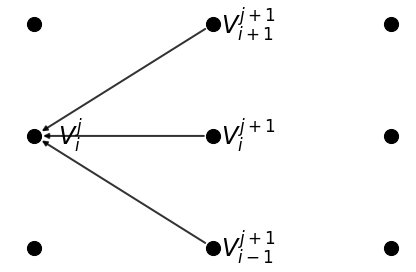

In [148]:
import networkx as nx
# import matplotlib.pyplot as plt

def draw_grid_graph_with_arrows(rows, cols, arrows, label_map=None, node_color='lightblue', node_size=800):
    # 创建一个网格图
    G = nx.grid_2d_graph(rows, cols)

    pos = dict((n, n) for n in G.nodes())
    label_pos = {node: (x+0.2, y) for node, (x, y) in pos.items()}  # 将标签稍微移动到节点的右边

    # 如果没有提供标签，为每个节点生成默认标签
#     if label_map is None:
#         label_map = {(i, j): f"$V_{{{i}}}^{{{j}}}$" for i in range(rows) for j in range(cols)}
    labels = {(1,0): "$V_{i+1}^{j+1}$", (0,1): "$V_{i}^{j}$",(1,1): "$V_{i}^{j+1}$",(1,2): "$V_{i-1}^{j+1}$"}
    label_map=labels
    # 绘制节点
    nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color)

    # 如果有标签，添加到节点上
    nx.draw_networkx_labels(G, label_pos, labels=label_map, font_size=24, font_weight="bold", font_family="Times New Roman")

#     # 绘制默认的边
#     for (u, v) in G.edges():
#         nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], alpha=0.5)

    # 绘制箭头
    for (u, v) in arrows:
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=2, alpha=0.8, edge_color='black', arrowstyle="-|>", arrows=True)

    plt.xticks([])
    plt.yticks([])
    plt.gca().invert_yaxis()  # 使(0,0)坐标位于图的左上角
    plt.axis('off')  # 关闭坐标轴显示
    plt.tight_layout()  # 为了确保图形完整显示
    plt.savefig('/Users/yiyaoluo/Desktop/Dissertation/figs/EFDM.png', dpi=300)
    plt.show()

# 使用函数绘制 4x4 的网格图，并在 (1, 1) 到 (2, 2) 和 (2, 3) 到 (3, 3) 之间添加箭头
# 并将节点颜色设置为黑色，节点大小设置为 700
draw_grid_graph_with_arrows(3, 3, [((1, 2), (0, 1)), ((1, 1), (0, 1)),((1, 0), (0, 1))], node_color='black', node_size=200)


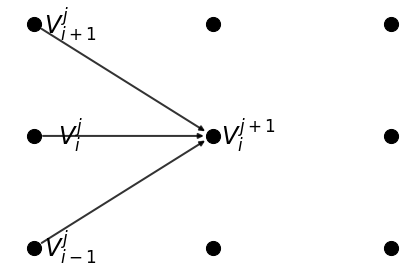

In [156]:
import networkx as nx
# import matplotlib.pyplot as plt

def draw_grid_graph_with_arrows(rows, cols, arrows, label_map=None, node_color='lightblue', node_size=800):
    # 创建一个网格图
    G = nx.grid_2d_graph(rows, cols)

    pos = dict((n, n) for n in G.nodes())
    label_pos = {node: (x+0.2, y) for node, (x, y) in pos.items()}  # 将标签稍微移动到节点的右边

    # 如果没有提供标签，为每个节点生成默认标签
#     if label_map is None:
#         label_map = {(i, j): f"$V_{{{i}}}^{{{j}}}$" for i in range(rows) for j in range(cols)}
    labels = {(0,0): "$V_{i+1}^{j}$", (0,1): "$V_{i}^{j}$",(1,1): "$V_{i}^{j+1}$",(0,2): "$V_{i-1}^{j}$"}
    label_map=labels
    # 绘制节点
    nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color)

    # 如果有标签，添加到节点上
    nx.draw_networkx_labels(G, label_pos, labels=label_map, font_size=24, font_weight="bold", font_family="Times New Roman")

#     # 绘制默认的边
#     for (u, v) in G.edges():
#         nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], alpha=0.5)

    # 绘制箭头
    for (u, v) in arrows:
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=2, alpha=0.8, edge_color='black', arrowstyle="-|>", arrows=True)

    plt.xticks([])
    plt.yticks([])
    plt.gca().invert_yaxis()  # 使(0,0)坐标位于图的左上角
    plt.axis('off')  # 关闭坐标轴显示
    plt.tight_layout()  # 为了确保图形完整显示
    plt.savefig('/Users/yiyaoluo/Desktop/Dissertation/figs/IFDM.png', dpi=300)
    plt.show()

# 使用函数绘制 4x4 的网格图，并在 (1, 1) 到 (2, 2) 和 (2, 3) 到 (3, 3) 之间添加箭头
# 并将节点颜色设置为黑色，节点大小设置为 700
draw_grid_graph_with_arrows(3, 3, [((0, 2), (1, 1)), ((0, 1), (1, 1)),((0, 0), (1, 1))], node_color='black', node_size=200)


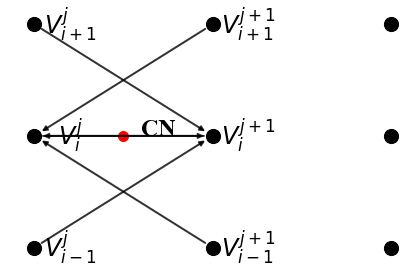

In [168]:
import networkx as nx
# import matplotlib.pyplot as plt

def draw_grid_graph_with_arrows(rows, cols, arrows, label_map=None,middle_nodes=None, node_color='lightblue', node_size=800,middle_node_size=100):
    # 创建一个网格图
    G = nx.grid_2d_graph(rows, cols)

    pos = dict((n, n) for n in G.nodes())
    label_pos = {node: (x+0.2, y) for node, (x, y) in pos.items()}  # 将标签稍微移动到节点的右边
# 添加在指定节点之间的新节点
    if middle_nodes:
        for (u, v), label in middle_nodes.items():
            middle_pos = ((u[0] + v[0]) / 2, (u[1] + v[1]) / 2)
            plt.scatter(*middle_pos, s=middle_node_size, c='red')  # 使用plt.scatter来绘制中间节点
            plt.text(middle_pos[0]+0.1, middle_pos[1], label, fontsize=24, weight="bold")

    # 如果没有提供标签，为每个节点生成默认标签
#     if label_map is None:
#         label_map = {(i, j): f"$V_{{{i}}}^{{{j}}}$" for i in range(rows) for j in range(cols)}
    labels = {(0,2): "$V_{i-1}^{j}$",(0,0): "$V_{i+1}^{j}$",(1,0): "$V_{i+1}^{j+1}$", (0,1): "$V_{i}^{j}$",(1,1): "$V_{i}^{j+1}$",(1,2): "$V_{i-1}^{j+1}$"}
    label_map=labels
    # 绘制节点
    nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color)

    # 如果有标签，添加到节点上
    nx.draw_networkx_labels(G, label_pos, labels=label_map, font_size=24, font_weight="bold", font_family="Times New Roman")

#     # 绘制默认的边
#     for (u, v) in G.edges():
#         nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], alpha=0.5)

    # 绘制箭头
    for (u, v) in arrows:
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=2, alpha=0.8, edge_color='black', arrowstyle="-|>", arrows=True)

    plt.xticks([])
    plt.yticks([])
    plt.gca().invert_yaxis()  # 使(0,0)坐标位于图的左上角
    plt.axis('off')  # 关闭坐标轴显示
    plt.tight_layout()  # 为了确保图形完整显示
    plt.savefig('/Users/yiyaoluo/Desktop/Dissertation/figs/CFDM.png', dpi=300)
    plt.show()

# 使用函数绘制 4x4 的网格图，并在 (1, 1) 到 (2, 2) 和 (2, 3) 到 (3, 3) 之间添加箭头
# 并将节点颜色设置为黑色，节点大小设置为 700
draw_grid_graph_with_arrows(3, 3, [((0, 2), (1, 1)), ((0, 1), (1, 1)),((0, 0), (1, 1)),((1, 1), (0, 1)),((1, 0), (0, 1)),((1, 2), (0, 1))], node_color='black', node_size=200,middle_nodes={((0, 1), (1, 1)): "CN"})


# Barrier Option

## Payoff

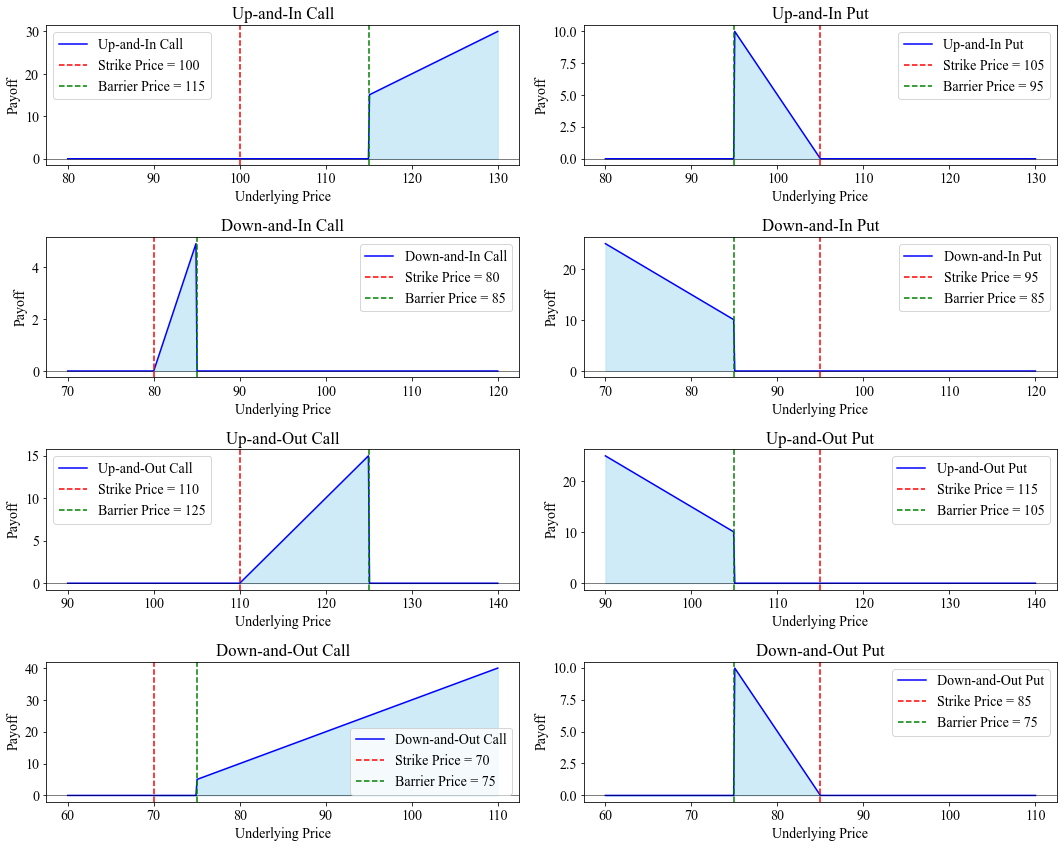

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Payoff functions
def call_payoff(s, k):
    return np.maximum(s - k, 0)

def put_payoff(s, k):
    return np.maximum(k - s, 0)

# Titles and Parameters
titles = [
    "Up-and-In Call", "Up-and-In Put",
    "Down-and-In Call", "Down-and-In Put",
    "Up-and-Out Call", "Up-and-Out Put",
    "Down-and-Out Call", "Down-and-Out Put"
]

parameters = [
    (np.linspace(80, 130, 400), 100, 115),  # Up-and-In Call
    (np.linspace(80, 130, 400), 105, 95),  # Up-and-In Put
    (np.linspace(70, 120, 400), 80, 85),    # Down-and-In Call
    (np.linspace(70, 120, 400), 95, 85),    # Down-and-In Put
    (np.linspace(90, 140, 400), 110, 125),  # Up-and-Out Call
    (np.linspace(90, 140, 400), 115, 105),  # Up-and-Out Put
    (np.linspace(60, 110, 400), 70, 75),    # Down-and-Out Call
    (np.linspace(60, 110, 400), 85, 75)     # Down-and-Out Put
]

# Plotting function
def plot_barrier_options():
    plt.figure(figsize=(15, 12))
    
    for i, (title, (S, K, B)) in enumerate(zip(titles, parameters), 1):
        plt.subplot(4, 2, i)
        
        condition = np.ones_like(S)  # By default, all ones

        if "In" in title:
            if "Up" in title:
                condition = np.where(S >= B, 1, 0)
            else:  # Down-and-In
                condition = np.where(S <= B, 1, 0)
        else:  # Out options
            if "Up" in title:
                condition = np.where(S < B, 1, 0)
            else:  # Down-and-Out
                condition = np.where(S > B, 1, 0)
        
        if "Call" in title:
            payoff = call_payoff(S, K)
        else:
            payoff = put_payoff(S, K)
        
        plt.plot(S, condition * payoff, label=title, color='blue')
        plt.fill_between(S, condition * payoff, where=(payoff > 0), color='skyblue', alpha=0.4)
        plt.axhline(0, color='black', linewidth=0.5)
        plt.axvline(K, color='red', linestyle='--', label=f'Strike Price = {K}')
        plt.axvline(B, color='green', linestyle='--', label=f'Barrier Price = {B}')
        plt.title(title)
        plt.xlabel('Underlying Price')
        plt.ylabel('Payoff')
        plt.legend()

    plt.tight_layout()
    plt.savefig('/Users/yiyaoluo/Desktop/Dissertation/figs/Barrier_Payoff.png', dpi=300)
    plt.show()

plot_barrier_options()


## Value

In [214]:
import math
from scipy.stats import norm
import matplotlib.pyplot as plt

def calculate_N(x):
    return norm.cdf(x) 

def calculate_barrier_option_price(S, X, H, T, r, b, sigma, K, option_type):
    tau = T
    mu = (b - 0.5 * sigma ** 2) / sigma ** 2
    x1 = (math.log(S / X) / (sigma * math.sqrt(tau))) + (1 + mu) * sigma * math.sqrt(T)
    x2 = (math.log(S / H) / (sigma * math.sqrt(tau))) + (1 + mu) * sigma * math.sqrt(T)
    y1 = (math.log(H ** 2 / (S * X)) / (sigma * math.sqrt(tau))) + (1 + mu) * sigma * math.sqrt(T)
    y2 = (math.log(H / S) / (sigma * math.sqrt(tau))) + (1 + mu) * sigma * math.sqrt(T)
    
    if option_type == "UO-C":
        phi=1
        eta=-1
    elif option_type == "UI-C":
        phi=1
        eta=-1
    elif option_type == "DO-C":
        phi=1
        eta=1
    elif option_type == "DI-C":
        phi=1
        eta=1
    elif option_type == "UO-P":
        phi=-1
        eta=-1
    elif option_type == "UI-P":
        phi=-1
        eta=1
    elif option_type == "DO-P":
        phi=-1
        eta=-1
    elif option_type == "DI-P":
        phi=-1
        eta=1
    
#     eta = -1 if option_type == "put" else 1
    
    
    lamda = math.sqrt(mu ** 2 + 2 * r / sigma ** 2)
    z = (math.log(H / S) / (sigma * math.sqrt(tau))) + lamda * sigma * math.sqrt(T)
    
    A = phi * S * math.exp((b - r) * T) * calculate_N(phi * x1) - phi * X * math.exp(-r * T) * calculate_N(phi * x1 - phi * sigma * math.sqrt(T))
    B = phi * S * math.exp((b - r) * T) * calculate_N(phi * x2) - phi * X * math.exp(-r * T) * calculate_N(phi * x2 - phi * sigma * math.sqrt(T))
    C = phi * S * math.exp((b - r) * T) * (H / S) ** (2 * (mu + 1)) * calculate_N(eta * y1) - phi * X * math.exp(-r * T) * (H / S) ** (2 * mu) * calculate_N(eta * y1 - eta * sigma * math.sqrt(T))
    D = phi * S * math.exp((b - r) * T) * (H / S) ** (2 * (mu + 1)) * calculate_N(eta * y2) - phi * X * math.exp(-r * T) * (H / S) ** (2 * mu) * calculate_N(eta * y2 - eta * sigma * math.sqrt(T))
    E = phi*K * math.exp(-r * T) * (calculate_N(eta * x2 - eta * sigma * math.sqrt(T)) - (H / S) ** (2 * mu) * calculate_N(eta * y2 - eta * sigma * math.sqrt(T)))
    F = K * ((H / S) ** (lamda + mu) * calculate_N(eta * z) - (H / S) ** (mu - lamda) * calculate_N(eta * z - 2 * eta * lamda * sigma * math.sqrt(T)))
        

    if option_type == "DO-C":
        if X > H:
            return max(0, A - C + F)
        else:
            return max(0, B - D + F)
    
    if option_type == "DO-P":
        if X > H:
            return max(0, A - B + C - D + F)
        else:
            return max(0, F)

    if option_type == "DI-C":
        if X > H:
            return max(0, C + E)
        else:
            return max(0, A - B + D + E)

    if option_type == "DI-P":
        if X > H:
            return max(0, B - C + D + E)
        else:
            return max(0, A + E)

    if option_type == "UO-C":
        if X > H:
            return max(0, F)
        else:
            return max(0, A - B + C - D + F)

    if option_type == "UO-P":
        if X > H:
            return max(0, B - D + F)
        else:
            return max(0, A - C + F)

    if option_type == "UI-C":
        if X > H:
            return max(0, A + E)
        else:
            return max(0, B - C + D + E)

    if option_type == "UI-P":
        if X > H:
            return max(0, A - B + D + E)
        else:
            return max(0, C + E)
def calculate_european_option_price(S, X, T, r, sigma, option_type):
    d1 = (math.log(S / X) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    
    if option_type == "call":
        return S * calculate_N(d1) - X * np.exp(-r * T) * calculate_N(d2)
    elif option_type == "put":
        return X * np.exp(-r * T) * calculate_N(-d2) - S * calculate_N(-d1)

In [219]:
import numpy as np

# Parameters
S_values = np.linspace(90, 150, 400)
X = 100
H_up = 110
H_down = 90
T = 1
r = 0.05
b = 0.05
sigma = 0.20
K = 0

# Calculate option prices
european_call_prices = [calculate_european_option_price(S, X, T, r, sigma, "call") for S in S_values]
UO_call_prices = [calculate_barrier_option_price(S, X, H_up, T, r, b, sigma, K, "UO-C") for S in S_values]
UI_call_prices = [calculate_barrier_option_price(S, X, H_up, T, r, b, sigma, K, "UI-C") for S in S_values]
sum_U_call_prices = [UO + UI for UO, UI in zip(UO_call_prices, UI_call_prices)]

DO_call_prices = [calculate_barrier_option_price(S, X, H_down, T, r, b, sigma, K, "DO-C") for S in S_values]
DI_call_prices = [calculate_barrier_option_price(S, X, H_down, T, r, b, sigma, K, "DI-C") for S in S_values]
sum_D_call_prices = [DO + DI for DO, DI in zip(DO_call_prices, DI_call_prices)]

# # Plotting
# plt.figure(figsize=(12, 8))

# plt.plot(S_values, european_call_prices, label='European Call', color='blue')
# plt.plot(S_values, sum_U_call_prices, label='Sum of UI-C and UO-C', color='green', linestyle='--')
# plt.plot(S_values, sum_D_call_prices, label='Sum of DI-C and DO-C', color='red', linestyle='--')

# plt.title('Comparison of European Call and Barrier Options')
# plt.xlabel('Stock Price')
# plt.ylabel('Option Price')
# plt.legend()
# plt.grid(True)
# plt.show()


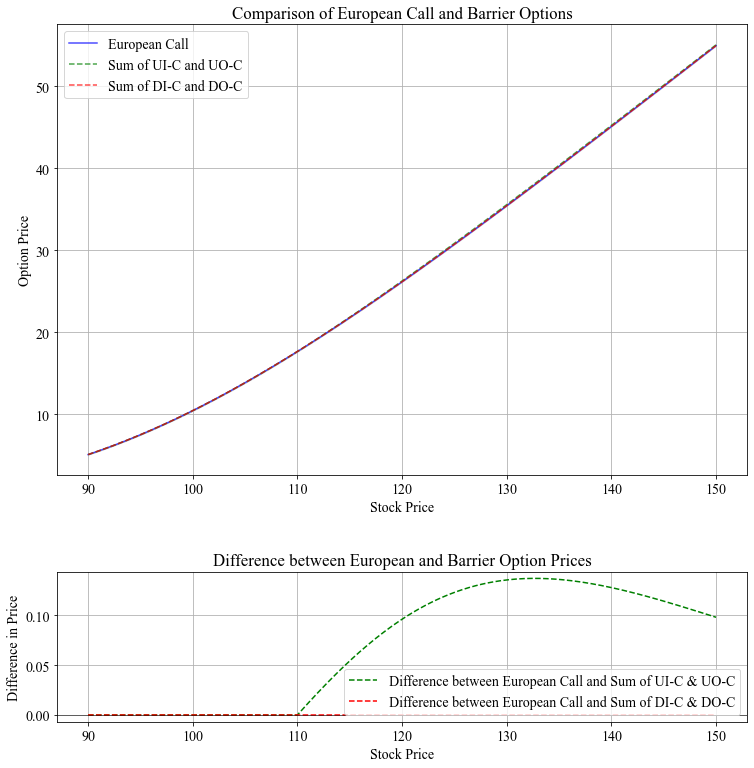

In [221]:
# Create a subplot for both the option prices and the difference
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), gridspec_kw={'height_ratios': [3, 1]})
fig.tight_layout(pad=5.0)  # Add padding between plots

# Plot on the first axis
ax1.plot(S_values, european_call_prices, label='European Call', color='blue', alpha=0.7)  # Adding alpha for transparency
ax1.plot(S_values, sum_U_call_prices, label='Sum of UI-C and UO-C', color='green', linestyle='--', alpha=0.7)
ax1.plot(S_values, sum_D_call_prices, label='Sum of DI-C and DO-C', color='red', linestyle='--', alpha=0.7)
ax1.fill_between(S_values, european_call_prices, sum_U_call_prices, color='gray', alpha=0.2)  # Shading difference
ax1.fill_between(S_values, european_call_prices, sum_D_call_prices, color='gray', alpha=0.2)
ax1.set_title('Comparison of European Call and Barrier Options')
ax1.set_xlabel('Stock Price')
ax1.set_ylabel('Option Price')
ax1.legend()
ax1.grid(True)

# Plot the difference on the second axis
difference_U = [abs(euro - sum_U) for euro, sum_U in zip(european_call_prices, sum_U_call_prices)]
difference_D = [abs(euro - sum_D) for euro, sum_D in zip(european_call_prices, sum_D_call_prices)]
ax2.plot(S_values, difference_U, label='Difference between European Call and Sum of UI-C & UO-C', color='green', linestyle='--')
ax2.plot(S_values, difference_D, label='Difference between European Call and Sum of DI-C & DO-C', color='red', linestyle='--')
ax2.axhline(0, color='black', linewidth=0.5)  # Zero line
ax2.set_title('Difference between European and Barrier Option Prices')
ax2.set_xlabel('Stock Price')
ax2.set_ylabel('Difference in Price')
ax2.legend()
ax2.grid(True)
plt.savefig('/Users/yiyaoluo/Desktop/Dissertation/figs/CPE.png', dpi=300)
plt.show()


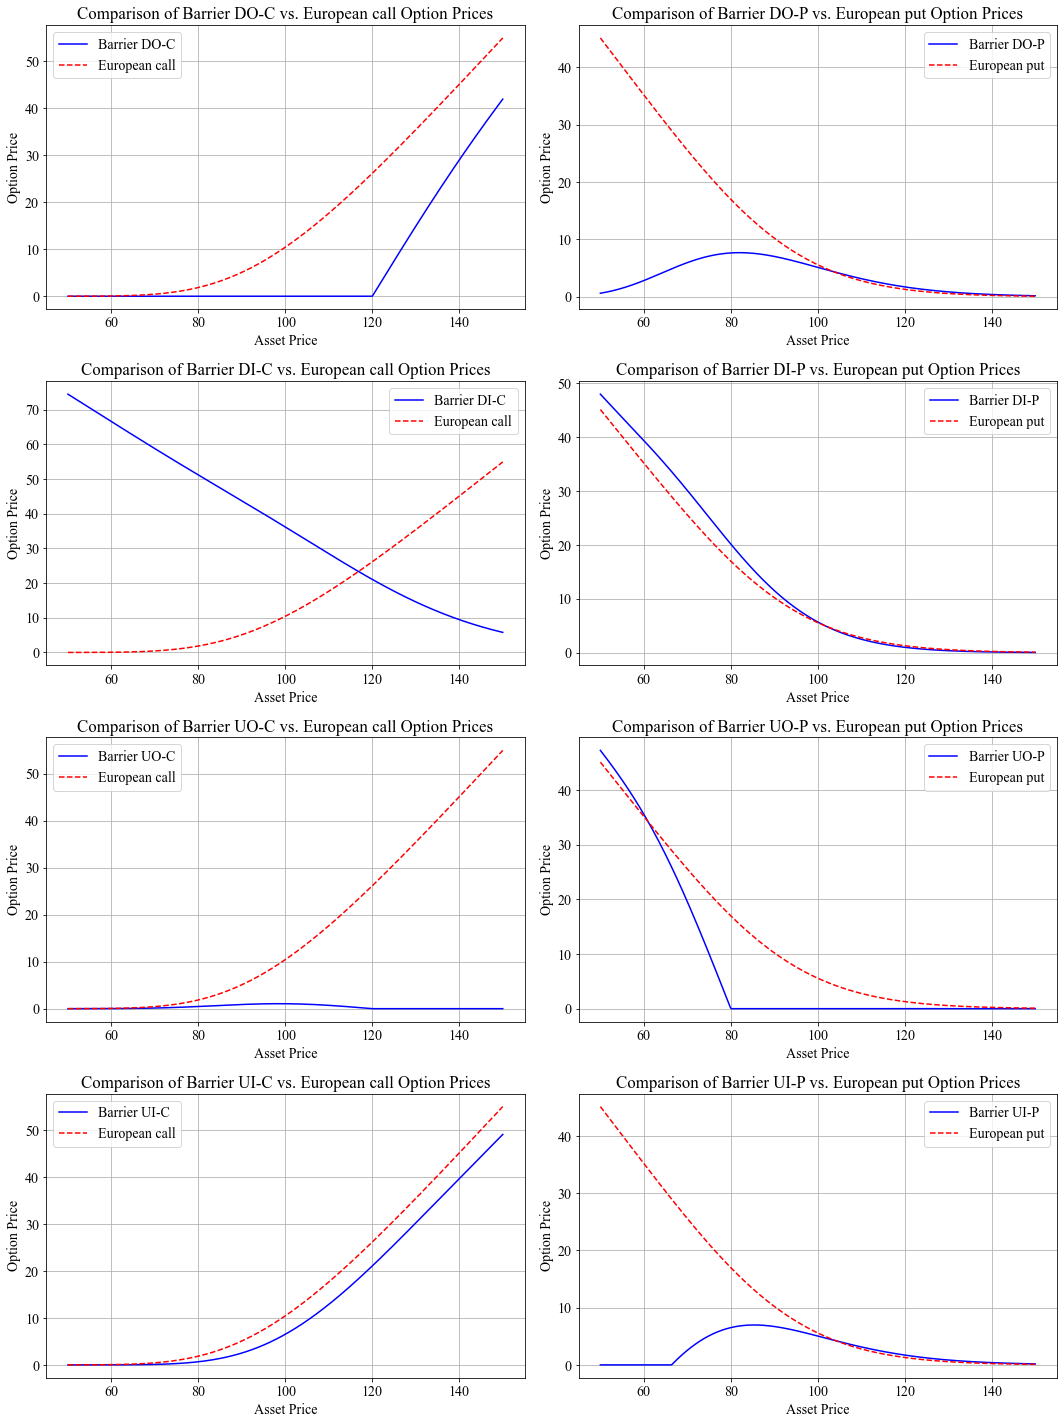

In [48]:


S_values = np.linspace(50, 150, 500)  # 资产价格范围从50到150

option_types = ["DO-C", "DO-P", "DI-C", "DI-P", "UO-C", "UO-P", "UI-C", "UI-P"]
european_types = ["call", "put", "call", "put", "call", "put", "call", "put"] # 对应的欧式期权类型

fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.ravel()

X = 100

T = 1
r = 0.05
b = 0
sigma = 0.2
K=0 

for idx, ax in enumerate(axes):

    if option_types[idx] in [ 'DO-P', 'DI-P', 'UI-P', 'UO-P']:
        H = 80
    elif option_types[idx] in ['UO-C', 'UI-C', 'DI-C','DO-C','DI-P']:
        H = 120
    # 计算障碍期权价格
    barrier_prices = [calculate_barrier_option_price(s, X, H, T, r, b, sigma, K, option_types[idx]) for s in S_values]
    ax.plot(S_values, barrier_prices, label=f'Barrier {option_types[idx]}', color='blue')
    
    # 计算欧式期权价格
    european_prices = [calculate_european_option_price(s, X, T, r, sigma, european_types[idx]) for s in S_values]
    ax.plot(S_values, european_prices, label=f'European {european_types[idx]}', color='red', linestyle='--')
    
    ax.set_title(f'Comparison of Barrier {option_types[idx]} vs. European {european_types[idx]} Option Prices')
    ax.set_xlabel('Asset Price')
    ax.set_ylabel('Option Price')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.savefig('/Users/yiyaoluo/Desktop/Dissertation/figs/2D_Barrier_Value.png', dpi=300)
plt.show()

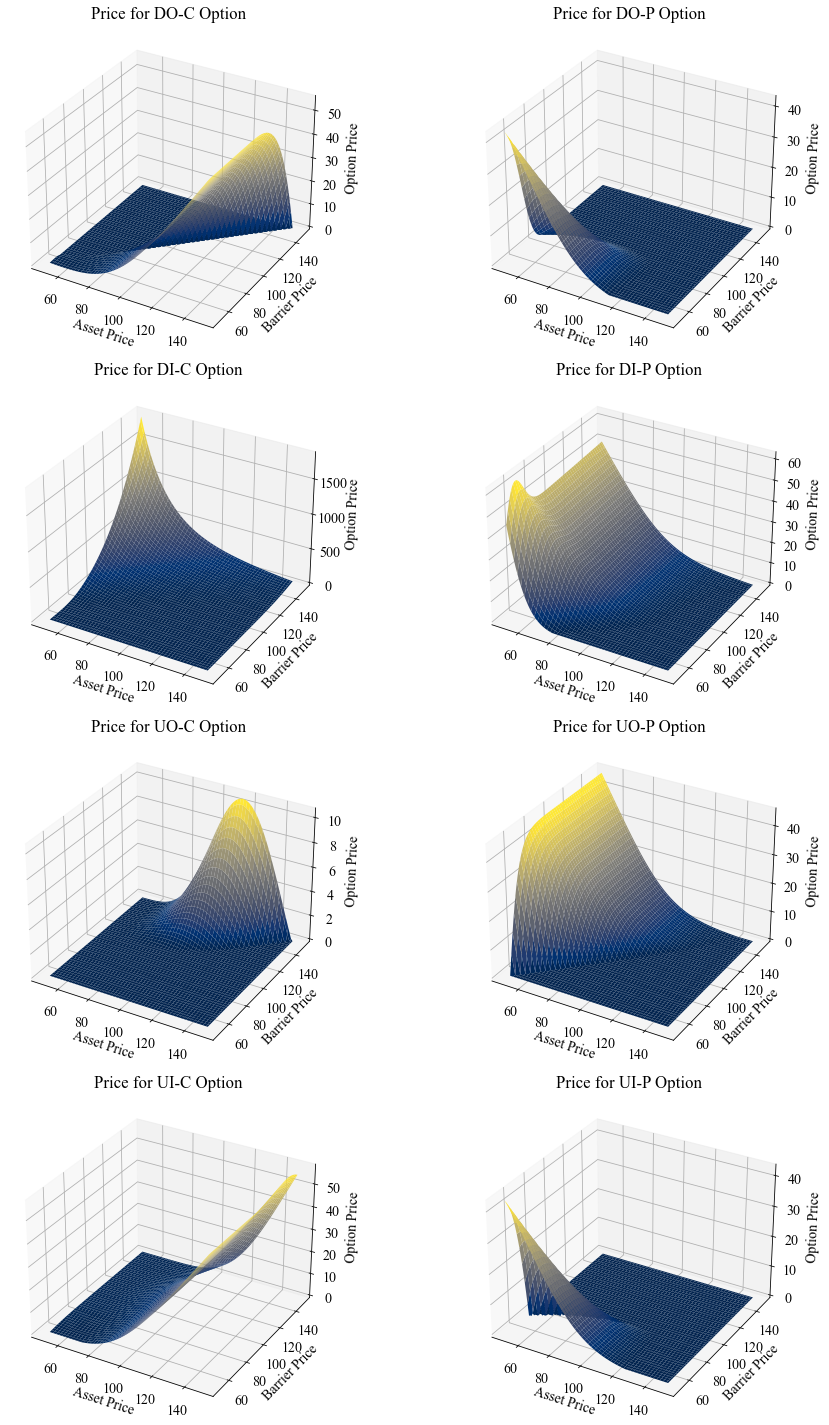

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 已经有了calculate_barrier_option_price函数

# 定义参数
X = 100  # 行权价格
T = 1  # 到期时间（年）
r = 0.05  # 无风险利率
b = 0.05  # 费率
sigma = 0.2  # 波动率
K = 1  # Strike，即对于已实现或已到期期权，K=1

# 创建一个网格来绘制
S_range = np.linspace(50, 150, 100)
H_range = np.linspace(50, 150, 100)
S_grid, H_grid = np.meshgrid(S_range, H_range)


def plot_option(option_type, ax):
    prices = np.zeros_like(S_grid)
    
    for i in range(S_grid.shape[0]):
        for j in range(S_grid.shape[1]):
            prices[i,j] = calculate_barrier_option_price(S_grid[i,j], X, H_grid[i,j], T, r, b, sigma, K, option_type)
    
    ax.plot_surface(S_grid, H_grid, prices, cmap='cividis')
    
    ax.set_xlabel('Asset Price')
    ax.set_ylabel('Barrier Price')
    ax.set_zlabel('Option Price')
    ax.set_title(f'Price for {option_type} Option')

# 绘制每种期权的图形
option_types = ["DO-C", "DO-P", "DI-C", "DI-P", "UO-C", "UO-P", "UI-C", "UI-P"]

fig = plt.figure(figsize=(15, 20))

for i, opt in enumerate(option_types):
    ax = fig.add_subplot(4, 2, i+1, projection='3d')
    plot_option(opt, ax)

plt.tight_layout()
plt.savefig('/Users/yiyaoluo/Desktop/Dissertation/figs/3D_Barrier_Value.png', dpi=300)
plt.show()


# Lookback Option

## Payoff

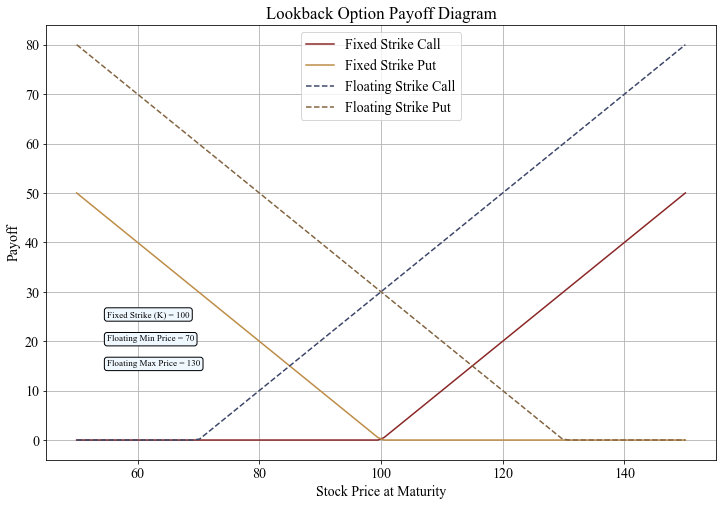

In [51]:
import matplotlib.pyplot as plt
import numpy as np

def fixed_strike_payoff(S, K, option_type='call'):
    if option_type == 'call':
        return np.maximum(S - K, 0)
    elif option_type == 'put':
        return np.maximum(K - S, 0)

def floating_strike_payoff(S, min_S, max_S, option_type='call'):
    if option_type == 'call':
        return np.maximum(S - min_S, 0)
    elif option_type == 'put':
        return np.maximum(max_S - S, 0)

# 设定参数
S = np.linspace(50, 150, 100)  # 股票价格范围
K = 100  # Fixed Strike
min_S = 70  # 假设期间的最小股价
max_S = 130  # 假设期间的最大股价

# 计算回报
fixed_call_payoffs = fixed_strike_payoff(S, K, 'call')
fixed_put_payoffs = fixed_strike_payoff(S, K, 'put')
floating_call_payoffs = floating_strike_payoff(S, min_S, max_S, 'call')
floating_put_payoffs = floating_strike_payoff(S, min_S, max_S, 'put')

# 绘图
plt.figure(figsize=(12, 8))
plt.plot(S, fixed_call_payoffs, label='Fixed Strike Call')
plt.plot(S, fixed_put_payoffs, label='Fixed Strike Put')
plt.plot(S, floating_call_payoffs, label='Floating Strike Call', linestyle='--')
plt.plot(S, floating_put_payoffs, label='Floating Strike Put', linestyle='--')

# 标注参数
plt.text(55, 25, f'Fixed Strike (K) = {K}', fontsize=9, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="aliceblue"))
plt.text(55, 20, f'Floating Min Price = {min_S}', fontsize=9, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="aliceblue"))
plt.text(55, 15, f'Floating Max Price = {max_S}', fontsize=9, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="aliceblue"))

plt.title("Lookback Option Payoff Diagram")
plt.xlabel("Stock Price at Maturity")
plt.ylabel("Payoff")
plt.legend()
plt.grid(True)
plt.savefig('/Users/yiyaoluo/Desktop/Dissertation/figs/LB_P.png', dpi=300)
plt.show()


## Value

In [58]:
import math
from scipy.stats import norm

def fixed_strike_lookback_option(S, K, r, sigma, T, S_max):
    d1 = (math.log(S/K) + (r + (sigma**2)/2)*T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    d3 = d1 - (2 * r * math.sqrt(T)) / sigma
    e1 = (math.log(S/S_max) + (r + (sigma**2)/2)*T) / (sigma * math.sqrt(T))
    e2 = e1 - sigma * math.sqrt(T)
    e3 = e1 - (2 * r * math.sqrt(T)) / sigma

    if S_max > K:
        term1 = S * norm.cdf(d1) - math.exp(-r * T) * K * norm.cdf(d2)
        term2 = math.exp(-r * T) * (sigma**2 / (2 * r)) * S * (math.exp(r * T) * norm.cdf(d1) - ((S / K)**(-2 * r / (sigma**2))) * norm.cdf(d3))
        option_price = term1 + term2
    else:
        term1 = math.exp(-r * T) * (S_max * (1 - norm.cdf(e2)) - K)
        term2 = math.exp(-r * T) * S * (sigma**2 / (2 * r)) * (math.exp(r * T) * norm.cdf(e1) - ((S / S_max)**(-2 * r / (sigma**2))) * norm.cdf(e3))
        option_price = term1 + term2

    return max(option_price,0)

def fixed_strike_lookback_option_put(S, K, r, sigma, T, S_min):
    d1 = (math.log(S/K) + (r + (sigma**2)/2)*T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    d3 = d1 - (2 * r * math.sqrt(T)) / sigma
    f1= (math.log(S/S_min) + (r + (sigma**2)/2)*T) / (sigma * math.sqrt(T))
    f2 = f1 - sigma * math.sqrt(T)
    f3 = f1 - (2 * r * math.sqrt(T)) / sigma

    if K > S_min:
        term1 = K * math.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
        term2 = math.exp(-r * T) * (sigma**2 / (2 * r)) * S * (-math.exp(r * T) * norm.cdf(-d1) + ((S / K)**(-2 * r / (sigma**2))) * norm.cdf(-d3))
        option_price = term1 + term2
    else:
        term1 = math.exp(-r * T) * (S_min * (norm.cdf(-f2) - 1) + K) - S * norm.cdf(-f1)
        term2 = math.exp(-r * T) * S * (sigma**2 / (2 * r)) * (-math.exp(r * T) * norm.cdf(-f1) + ((S / S_min)**(-2 * r / (sigma**2))) * norm.cdf(-f3))
        option_price = term1 + term2

    return max(option_price,0)


def calculate_floating_call_option_price(S, S_min, r, sigma, tau):
    d1 = (math.log(S / S_min) + (r + 0.5 * sigma**2) * tau) / (sigma * math.sqrt(tau))
    d2 = d1 - sigma * math.sqrt(tau)
    d3 = d1 - (2 * r / sigma) * math.sqrt(tau)

    N = lambda x: 0.5 * (1 + math.erf(x / math.sqrt(2)))

    option_price = S * N(d1) - S_min * math.exp(-r * tau) * N(d2) + math.exp(-r * tau) * (sigma**2 / (2 * r)) * S * ((S / S_min)**(-2 * r / sigma**2) * N(-d3) - math.exp(r * tau) * N(-d1))
    return max(option_price,0)

def calculate_floating_put_option_price(S, S_max, r, sigma, tau):
    d1 = (math.log(S/S_max) + (r + (sigma**2)/2)*tau) / (sigma*math.sqrt(tau))
    d2 = d1 - sigma*math.sqrt(tau)
    d3 = d1 - (2*r/(sigma))*math.sqrt(tau)

    term1 = -S * norm.cdf(-d1)
    term2 = S_max * math.exp(-r*tau) * norm.cdf(-d2)
    term3 = math.exp(-r*tau) * (sigma**2) / (2*r) * S * (-((S/S_max)**(-2*r/(sigma**2))) * norm.cdf(d3) + math.exp(r*tau) * norm.cdf(d1))

    P_Floating = term1 + term2 + term3
    return max(P_Floating,0)


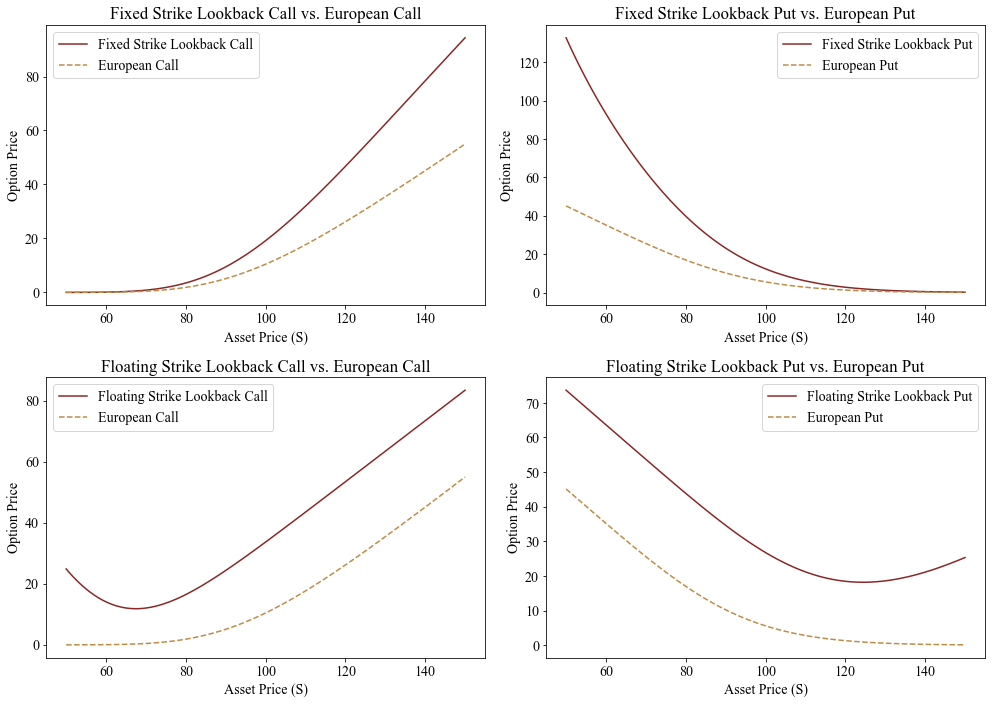

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

# ... (四个函数和欧式期权函数)

# 参数设定
S_range = np.linspace(50, 150, 100)
K = 100
r = 0.05
sigma = 0.2
T = 1
S_max=130
S_min=70

call_prices_fixed = [fixed_strike_lookback_option(S, K, r, sigma, T, S_max) for S in S_range]
call_prices_floating = [calculate_floating_call_option_price(S, S_min, r=r, sigma=sigma, tau=T) for S in S_range]
call_prices_european = [european_call_option_price(S, K, r, sigma, T) for S in S_range]

put_prices_fixed = [fixed_strike_lookback_option_put(S, K, r, sigma, T, S_min) for S in S_range]
put_prices_floating = [calculate_floating_put_option_price(S, S_max, r=r, sigma=sigma, tau=T) for S in S_range]
put_prices_european = [european_put_option_price(S, K, r, sigma, T) for S in S_range]

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 固定行权价回望看涨
axs[0, 0].plot(S_range, call_prices_fixed, label='Fixed Strike Lookback Call')
axs[0, 0].plot(S_range, call_prices_european, label='European Call', linestyle='--')
axs[0, 0].set_title('Fixed Strike Lookback Call vs. European Call')
axs[0, 0].legend()

# 固定行权价回望看跌
axs[0, 1].plot(S_range, put_prices_fixed, label='Fixed Strike Lookback Put')
axs[0, 1].plot(S_range, put_prices_european, label='European Put', linestyle='--')
axs[0, 1].set_title('Fixed Strike Lookback Put vs. European Put')
axs[0, 1].legend()

# 浮动行权价回望看涨
axs[1, 0].plot(S_range, call_prices_floating, label='Floating Strike Lookback Call')
axs[1, 0].plot(S_range, call_prices_european, label='European Call', linestyle='--')
axs[1, 0].set_title('Floating Strike Lookback Call vs. European Call')
axs[1, 0].legend()

# 浮动行权价回望看跌
axs[1, 1].plot(S_range, put_prices_floating, label='Floating Strike Lookback Put')
axs[1, 1].plot(S_range, put_prices_european, label='European Put', linestyle='--')
axs[1, 1].set_title('Floating Strike Lookback Put vs. European Put')
axs[1, 1].legend()

for ax in axs.flat:
    ax.set(xlabel='Asset Price (S)', ylabel='Option Price')

plt.tight_layout()
plt.savefig('/Users/yiyaoluo/Desktop/Dissertation/figs/LB_value.png', dpi=300)
plt.show()


# Results

In [199]:
from numpy import sqrt, exp, cumsum, sum, maximum, mean
from numpy.random import standard_normal
import numpy as np

# Parameters
S0 = 110; T = 1; K = 110; r = 0.35; sigma = 0.5
M = 252;dt =T/M; I = 10000

In [200]:
def MC_Fixed_Lookback_call_option_price(S0, K, r, sigma, T, I, M):
    payoff=np.zeros(I)
    # Simulate I paths with M time steps
    S = S0 * exp(
        cumsum((r - 0.5 * sigma**2) * dt + sigma * sqrt(dt) * standard_normal(
            (M, I)),
               axis=0))
    for i in range(I):
        payoff[i] = max(max(S[:, i]) - K, 0)

    # Calculate the Monte Carlo estimator
    C0 = exp(-r * T) * mean(payoff)
    return C0
MC_Fixed_Lookback_call_option_price(S0, K, r, sigma, T, I, M)

59.61619466784195

In [201]:
def quasi_MC_Fixed_Lookback_call_option_price(S, K, r, sigma, T, I, M):
    np.random.seed(0)  # 设置随机种子以保持结果的一致性
    dt = T / m  # 时间步长
    # 生成 Sobol 序列
    sobol = np.random.default_rng().random((n, m))
    sobol = np.column_stack((sobol, 1 - sobol))  # 使用维度扩展 Sobol 序列

    paths = np.zeros((n, m + 1))
    paths[:, 0] = S
    payoff = np.zeros(n)
    for i in range(1, m + 1):
        z = norm.ppf(sobol[:, i - 1])
        paths[:, i] = paths[:, i - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)
    for j in range(n):
        payoff[j]=max(max(paths[j])-K,0) 
    return exp(-r * T) * mean(payoff)

In [202]:
from scipy.stats import norm, qmc

def quasi_MC_Fixed_Lookback_call_option_price(S, K, r, sigma, T, n, m):
    dt = T / m  # 时间步长
    
    # 生成 Sobol 序列
    sampler = qmc.Sobol(d=m)
    sobol = sampler.random(n)
    
    paths = np.zeros((n, m + 1))
    paths[:, 0] = S
    payoff = np.zeros(n)
    for i in range(1, m + 1):
        z = norm.ppf(sobol[:, i - 1])
        paths[:, i] = paths[:, i - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)
    for j in range(n):
        payoff[j] = max(max(paths[j]) - K, 0)
        
    return exp(-r * T) * mean(payoff)


In [203]:
quasi_MC_Fixed_Lookback_call_option_price(S0, K, r, sigma, T, I, M)

/Users/yiyaoluo/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_qmc.py:1078: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  warnings.warn("The balance properties of Sobol' points require"


59.95946034859822

/Users/yiyaoluo/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_qmc.py:1078: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  warnings.warn("The balance properties of Sobol' points require"


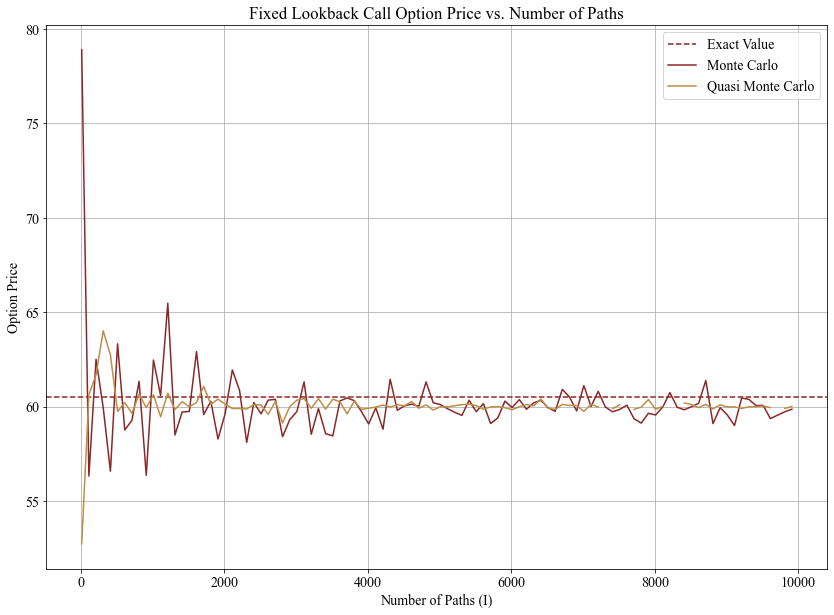

In [211]:
import numpy as np
import matplotlib.pyplot as plt

# ... [你的函数定义]

# 参数设置
# S0 = 110; T = 1; K = 110; r = 0.35; sigma = 0.5; M = 1001

# I的取值范围
Is = np.arange(10, 10001, 100)  # 从10开始，每次增加100，到10000
MC_results = []
quasi_MC_results = []

# 对每个I计算期权价格
for I in Is:
    MC_results.append(MC_Fixed_Lookback_call_option_price(S0, K, r, sigma, T, I, M))
    quasi_MC_results.append(quasi_MC_Fixed_Lookback_call_option_price(S0, K, r, sigma, T, I, M))

# 绘图
plt.figure(figsize=(14,10))
plt.axhline(y=60.49656, linestyle='--', label='Exact Value')
plt.plot(Is, MC_results, label='Monte Carlo')
plt.plot(Is, quasi_MC_results, label='Quasi Monte Carlo')
plt.xlabel('Number of Paths (I)')
plt.ylabel('Option Price')
plt.title('Fixed Lookback Call Option Price vs. Number of Paths')
plt.legend()
plt.grid(True)
plt.savefig('/Users/yiyaoluo/Desktop/Dissertation/figs/result.png', dpi=300)
plt.show()
